In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!ls "drive/My Drive/AI"

'bfs-aycc-hcy (2020-10-14 at 02:11 GMT-7)'   Diabetes.csv


In [3]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/AI/Diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### PreProcessing


In [4]:
#check empty
def empty_check(data) :
  new_data = data.dropna(axis = 0, how ='any')
  print("Panjang dataframe sebelumnya:", len(data)) 
  print("Panjang dataframe setelah dilakukan pengecekan empty value :", len(new_data))  
  print("Jumlah baris dengan setidaknya 1 empty value : ", (len(data)-len(new_data))) 
  return new_data

In [5]:
#empty check
empty_check(data)

Panjang dataframe sebelumnya: 768
Panjang dataframe setelah dilakukan pengecekan empty value : 768
Jumlah baris dengan setidaknya 1 empty value :  0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


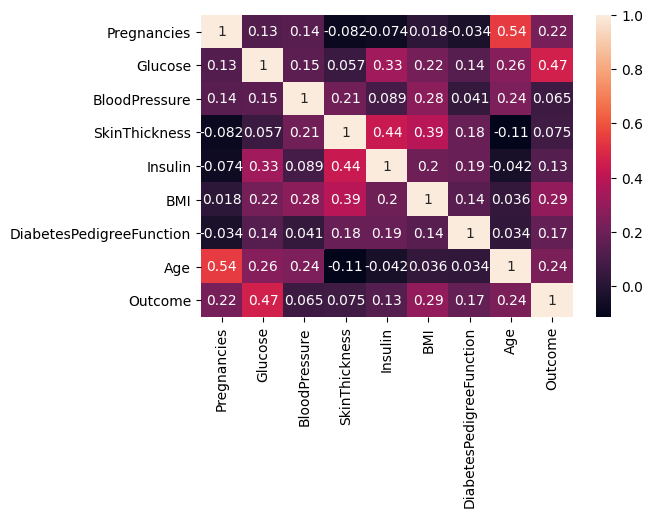

In [6]:
import seaborn as sns
import matplotlib as mpl; mpl.rcParams['figure.dpi'] = 100

sns.heatmap(data.corr(), vmax=1, annot=True)

<Figure size 9000x9000 with 0 Axes>

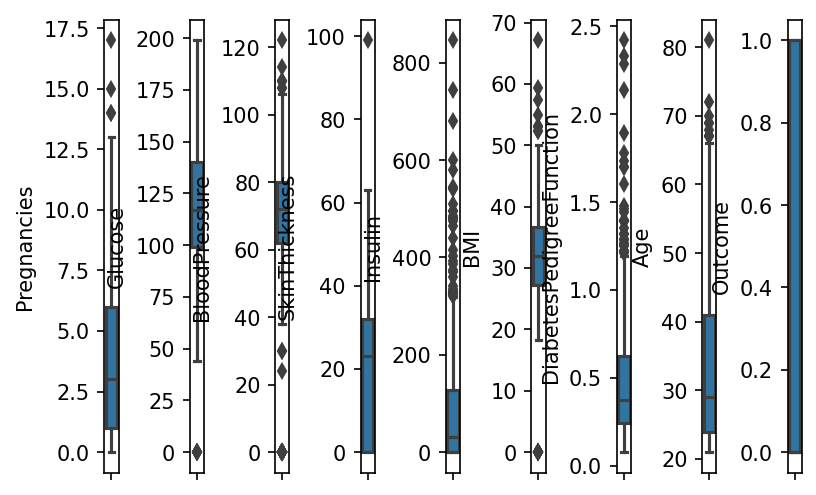

In [7]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import seaborn as sns

#check outlier
def Check_outlier(data):
  plt.figure(figsize=(60, 60))
  f, axes = plt.subplots(1, 9)
  sns.boxplot(y=data["Pregnancies"], ax=axes[0])
  sns.boxplot(y=data["Glucose"], ax=axes[1])
  sns.boxplot(y=data["BloodPressure"], ax=axes[2])
  sns.boxplot(y=data["SkinThickness"], ax=axes[3])
  sns.boxplot(y=data["Insulin"], ax=axes[4])
  sns.boxplot(y=data["BMI"], ax=axes[5])
  sns.boxplot(y=data["DiabetesPedigreeFunction"], ax=axes[6])
  sns.boxplot(y=data["Age"], ax=axes[7])
  sns.boxplot(y=data["Outcome"], ax=axes[8])
  plt.subplots_adjust(wspace=5)

Check_outlier(data)

# handle outlier


In [8]:
import numpy as np
#handle outlier 
while True:
  qlo1, qlo3 = np.percentile(data['Pregnancies'],[25,75])
  iqrlo = qlo3 - qlo1
  lowerlo = qlo1 - (1.5 * iqrlo)
  upperlo = qlo3 + (1.5 * iqrlo)
  outlierlo = data[(data['Pregnancies'] < (lowerlo)) | (data['Pregnancies'] > (upperlo))]
  print('amount of outlier data',outlierlo.shape[0]) #amount of outlier data
  idxlo = outlierlo.index
  data.drop(idxlo, inplace=True) #drop outlier data
  if (outlierlo.shape[0] <= 0):
    break

data['Pregnancies'].describe()

amount of outlier data 4
amount of outlier data 0


count    764.000000
mean       3.786649
std        3.278714
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       13.000000
Name: Pregnancies, dtype: float64

In [9]:
#handle outlier 
while True:
  qlo1, qlo3 = np.percentile(data['BloodPressure'],[15,60])
  iqrlo = qlo3 - qlo1
  lowerlo = qlo1 - (1.5 * iqrlo)
  upperlo = qlo3 + (1.5 * iqrlo)
  outlierlo = data[(data['BloodPressure'] < (lowerlo)) | (data['BloodPressure'] > (upperlo))]
  print('amount of outlier data',outlierlo.shape[0]) #amount of outlier data
  idxlo = outlierlo.index
  data.drop(idxlo, inplace=True) #drop outlier data
  if (outlierlo.shape[0] <= 0):
    break

data['BloodPressure'].describe()

amount of outlier data 54
amount of outlier data 8
amount of outlier data 0


count    702.000000
mean      71.625356
std       10.738393
min       40.000000
25%       64.000000
50%       72.000000
75%       80.000000
max       95.000000
Name: BloodPressure, dtype: float64

In [10]:
#handle outlier 

while True:
  qla1, qla3 = np.percentile(data['DiabetesPedigreeFunction'],[20,70])
  iqrla = qla3 - qla1
  lowerla = qla1 - (1.5 * iqrla)
  upperla = qla3 + (1.5 * iqrla)
  outlierla = data[(data['DiabetesPedigreeFunction'] < (lowerla)) | (data['DiabetesPedigreeFunction'] > (upperla))]
  print('amount of outlier data',outlierla.shape[0] ) #amount of outlier data
  idxla = outlierla.index
  data.drop(idxla, inplace=True) #drop outlier data
  if (outlierla.shape[0] <= 0):
    break

data['DiabetesPedigreeFunction'].describe()

amount of outlier data 43
amount of outlier data 6
amount of outlier data 0


count    653.000000
mean       0.411864
std        0.220016
min        0.078000
25%        0.240000
50%        0.356000
75%        0.565000
max        0.970000
Name: DiabetesPedigreeFunction, dtype: float64

<Figure size 4000x4000 with 0 Axes>

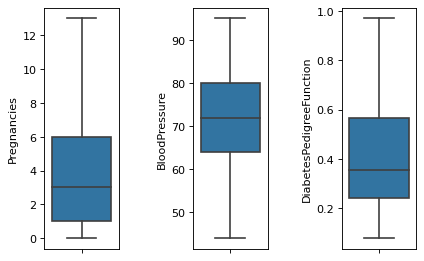

In [11]:
#check outlier
def Handle_outlier(data):
  mpl.rcParams['figure.dpi'] = 80
  plt.figure(figsize=(50, 50))
  f, axes = plt.subplots(1, 3)
  sns.boxplot(y=data['Pregnancies'],ax=axes[0])
  sns.boxplot(y=data["BloodPressure"], ax=axes[1])
  sns.boxplot(y=data["DiabetesPedigreeFunction"], ax=axes[2])
  plt.subplots_adjust(wspace=1)

Handle_outlier(data)

# Feauture engineer(scale:MinMaxScaler)

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler  

def scale(data) :
  #normalisasi
  scaler = MinMaxScaler(feature_range=(0, 1))

  data_scaled = scaler.fit_transform(data)
  data_norm = pd.DataFrame(data_scaled)
  data_norm = data_norm.rename(columns={0:'Pregnancies',1:'Glucose',2:'BloodPressure',3:'SkinThickness',4:'Insulin',5:'BMI',6:'DiabetesPedigreeFunction',7:'Age',8:'Outcome'})

  return data_norm

#scale value
data = scale(data)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.747475,0.549020,0.353535,0.000000,0.631579,0.615471,0.483333,1.0
1,0.076923,0.429293,0.431373,0.292929,0.000000,0.500000,0.306054,0.166667,0.0
2,0.615385,0.924242,0.392157,0.000000,0.000000,0.437970,0.665919,0.183333,1.0
3,0.076923,0.449495,0.431373,0.232323,0.111111,0.528195,0.099776,0.000000,0.0
4,0.384615,0.585859,0.588235,0.000000,0.000000,0.481203,0.137892,0.150000,0.0
...,...,...,...,...,...,...,...,...,...
648,0.769231,0.510101,0.627451,0.484848,0.212766,0.618421,0.104260,0.700000,0.0
649,0.153846,0.616162,0.509804,0.272727,0.000000,0.691729,0.293722,0.100000,0.0
650,0.384615,0.611111,0.549020,0.232323,0.132388,0.492481,0.187220,0.150000,0.0
651,0.076923,0.636364,0.313725,0.000000,0.000000,0.565789,0.303812,0.433333,1.0


### Split data

In [13]:
#1.	Baris ke-1 sampai baris ke-614 sebagai training set dan sisanya sebagai testing set;
data_train1 = data.iloc[0:613]
data_test1 = data.iloc[614:767]

#2.	Baris ke-1 sampai baris ke-461 ditambah baris ke-615 sampai 768 sebagai training set dan yang lain sebagai testing set;
data_train2a = data.iloc[0:460]
data_train2b = data.iloc[614:767]
data_train2 = pd.concat([data_train2a, data_train2b])

data_test2 = data.iloc[461:613]

#3.	Baris ke-1 sampai baris ke-307 ditambah baris ke-462 sampai 768 sebagai training set dan yang lain sebagai testing set;
data_train3a = data.iloc[0:306]
data_train3b = data.iloc[461:767]
data_train3 = pd.concat([data_train3a, data_train3b])

data_test3 = data.iloc[307:460]

#4.	Baris ke-1 sampai baris ke-154 ditambah baris ke-308 sampai 768 sebagai training set dan yang lain sebagai testing set;
data_train4a = data.iloc[0:153]
data_train4b = data.iloc[307:767]
data_train4 = pd.concat([data_train4a, data_train4b])

data_test4 = data.iloc[154:306]

#5.	Baris ke-155 sampai sampai 768 sebagai training set dan yang lain sebagai testing set.
data_train5 = data.iloc[154:767]
data_test5 = data.iloc[0:153]

# Distance using manhattan


In [14]:
import numpy as np

def manhattan_distance(train, test):
    data = len(train)-1
    sum = 0

    for i in range(data):
        sum += abs(float(train[i]) - float(test[i]))
    return sum
  
data_train = data_train1.to_numpy()
data_test = data_test1.to_numpy()

In [15]:
def get_nearest_neighbour(tes,train):
    tv = []  
    temp = []
    
    for i in range(0,len(tes)):
        for j in range(0,len(train)):
            temp.append([manhattan_distance(train[j], tes[i]), train[j][8]])
        tv.append(temp)
        temp = [] 
    return tv

get_nearest_neighbour(data_test,data_train)

[[[1.2511798085587809, 1.0],
  [1.1997300331332457, 0.0],
  [2.236249190855669, 1.0],
  [1.438146855866802, 0.0],
  [1.0115663714498906, 0.0],
  [1.3538345014613293, 1.0],
  [1.937088029644426, 1.0],
  [0.9062675683557553, 0.0],
  [1.6572649232848595, 1.0],
  [2.8507428476968517, 1.0],
  [1.7520779348158273, 1.0],
  [1.388323511818363, 1.0],
  [1.0595500977909453, 1.0],
  [1.135969669566495, 1.0],
  [1.3414640765929833, 0.0],
  [1.3406278935815652, 0.0],
  [1.5928963638261282, 1.0],
  [0.8854474368489555, 1.0],
  [1.5415142058929887, 1.0],
  [1.2021741206764645, 1.0],
  [0.9576689320820158, 1.0],
  [1.812398889660161, 0.0],
  [1.9296152077485422, 0.0],
  [0.9935785698395203, 0.0],
  [1.0704223362902507, 0.0],
  [1.6812092361000257, 1.0],
  [1.5229072611645618, 0.0],
  [1.520426142061178, 0.0],
  [1.2508408212562094, 0.0],
  [1.887245815010208, 0.0],
  [1.4858501403788718, 0.0],
  [1.2410946401950025, 1.0],
  [0.9864547951027007, 1.0],
  [1.2698661201389416, 0.0],
  [1.4059166276099733,

# KNN

In [16]:
def IndexSort(data):
        return data[0]

def Main_KNN(neighbors, k):
    temp = []
    knn = []

    for x in range(len(neighbors)):
        neighbors[x].sort(key = IndexSort)
        
    for x in range(len(neighbors)):
        for j in range(0,k):
          temp.append(neighbors[x][j])
        knn.append(temp)
        temp = []
    return knn

In [ ]:
# Main_KNN(get_nearest_neighbour(data_test,data_train),25)

In [17]:
from collections import Counter

# return data class prediksi
def predict(Test,Train,k):
    Distances = get_nearest_neighbour(Test,Train)
    NearestNeighbors = Main_KNN(Distances,k)
    
    NearestNeighbors2 = []
    temp = []
    for i in range(len(NearestNeighbors)):
        for j in range(len(NearestNeighbors[i])):
            temp.append(NearestNeighbors[i][j][1])
        NearestNeighbors2.append(temp)
        temp = []

    #nampung HASIL Prediksi
    Hasil = []
    for i in range(len(NearestNeighbors2)):
        data = Counter(NearestNeighbors2[i])
        Hasil.append(data.most_common(1)[0][0])
        
    return Hasil 

prediction = predict(data_test,data_train,10)
print(prediction)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]


In [18]:
#cari akurasi
def Accuracy(tes, predict):
    testSet = tes['Outcome'].values.tolist()
    correct = 0
    for x in range(len(predict)):
        if testSet[x] == predict[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [21]:
def Kvalue(tes,train):
    data_train = train.to_numpy()
    data_test = tes.to_numpy()
    
    K = []
    for i in range(len(data_test)):
        K.append((Accuracy(tes,predict(data_test,data_train,i+1))))
    return [K.index(max(K)), max(K)]

## MAIN

In [ ]:
def main():
  CrossVal = Kvalue(data_test1,data_train1)
  print("Case-1")
  print("Value K : ",CrossVal[0],", Accuracy : ", CrossVal[1])  
  print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

  CrossVal2 = Kvalue(data_test2,data_train2)
  print("Case-2")
  print("Value K : ",CrossVal2[0],", Accuracy : ", CrossVal2[1])
  print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

  CrossVal3 = Kvalue(data_test3,data_train3)
  print("Case-3")
  print("Value K : ",CrossVal3[0],", Accuracy : ", CrossVal3[1])
  print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

  CrossVal4 = Kvalue(data_test4,data_train4)
  print("Case-4")
  print("Value K : ",CrossVal4[0],", Accuracy : ", CrossVal4[1])
  print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

  CrossVal5 = Kvalue(data_test5,data_train5)
  print("Case-5")
  print("Value K : ",CrossVal5[0],", Accuracy : ", CrossVal5[1])
  print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

  avg = (CrossVal[1] + CrossVal2[1] + CrossVal3[1] + CrossVal4[1] + CrossVal5[1])/5
  print("average Accuracy : ", avg)

main()